# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = # YOUR CODE HERE this was the original, see below
    
    # Build query URL
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Get weather data
        weather_response = requests.get(city_url)
        
        
        # Parse the JSON and retrieve data
        city_weather = weather_response.json()
        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]# YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]# YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"]# YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]# YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"]# YOUR CODE HERE
        city_country = city_weather["sys"]["country"]# YOUR CODE HERE
        city_date =  city_weather["dt"]# YOUR CODE HERE

        
        
        
        #Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | midland
Processing Record 2 of Set 1 | haines junction
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | pudozh
Processing Record 7 of Set 1 | ust-kuyga
Processing Record 8 of Set 1 | sisimiut
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | hadrut
Processing Record 13 of Set 1 | yumen
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | nanortalik
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | susangerd
Processing Record 22 of Set 1 | albany
Processing R

Processing Record 33 of Set 4 | ilulissat
Processing Record 34 of Set 4 | barabinsk
Processing Record 35 of Set 4 | flinders
Processing Record 36 of Set 4 | muroto
Processing Record 37 of Set 4 | saint-philippe
Processing Record 38 of Set 4 | vestmannaeyjar
Processing Record 39 of Set 4 | dharchula
Processing Record 40 of Set 4 | nikolskoye
Processing Record 41 of Set 4 | frutal
Processing Record 42 of Set 4 | vereshchagino
Processing Record 43 of Set 4 | omboue
Processing Record 44 of Set 4 | west lafayette
Processing Record 45 of Set 4 | wahiawa
Processing Record 46 of Set 4 | ahuimanu
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | vao
Processing Record 0 of Set 5 | muravlenko
Processing Record 1 of Set 5 | cairns
Processing Record 2 of Set 5 | palmer
Processing Record 3 of Set 5 | sheregesh
Processing Record 4 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 5 | sibolga
Processing Record 6 of Se

Processing Record 26 of Set 8 | san jose
Processing Record 27 of Set 8 | paucartambo
City not found. Skipping...
Processing Record 28 of Set 8 | banhigan
Processing Record 29 of Set 8 | lac du bonnet
Processing Record 30 of Set 8 | matay
Processing Record 31 of Set 8 | iquique
Processing Record 32 of Set 8 | bergerac
Processing Record 33 of Set 8 | porosozero
Processing Record 34 of Set 8 | una
Processing Record 35 of Set 8 | santa marta
Processing Record 36 of Set 8 | chilia veche
Processing Record 37 of Set 8 | halalo
City not found. Skipping...
Processing Record 38 of Set 8 | mount pleasant
Processing Record 39 of Set 8 | sug-aksy
City not found. Skipping...
Processing Record 40 of Set 8 | pozo colorado
Processing Record 41 of Set 8 | svetlaya
Processing Record 42 of Set 8 | luena
Processing Record 43 of Set 8 | yabrud
Processing Record 44 of Set 8 | shubarkuduk
Processing Record 45 of Set 8 | kokopo
Processing Record 46 of Set 8 | constitucion
Processing Record 47 of Set 8 | ozgon


Processing Record 14 of Set 12 | pando
Processing Record 15 of Set 12 | ust-karsk
Processing Record 16 of Set 12 | aitape
Processing Record 17 of Set 12 | atherton
Processing Record 18 of Set 12 | valleyview
Processing Record 19 of Set 12 | ginir
Processing Record 20 of Set 12 | bridlington
Processing Record 21 of Set 12 | lishu
Processing Record 22 of Set 12 | kerteh
City not found. Skipping...
Processing Record 23 of Set 12 | yate
Processing Record 24 of Set 12 | meyungs
City not found. Skipping...
Processing Record 25 of Set 12 | rio gallegos
Processing Record 26 of Set 12 | lebanon
Processing Record 27 of Set 12 | zvishavane
Processing Record 28 of Set 12 | zhengjiatun
Processing Record 29 of Set 12 | mogzon
Processing Record 30 of Set 12 | kizukuri
Processing Record 31 of Set 12 | korenovsk
Processing Record 32 of Set 12 | meulaboh
Processing Record 33 of Set 12 | sinnamary
Processing Record 34 of Set 12 | parana
Processing Record 35 of Set 12 | moindou
Processing Record 36 of Set

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,midland,31.9974,-102.0779,279.85,54,0,4.63,US,1669910471
1,haines junction,60.7522,-137.5108,260.66,87,100,1.05,CA,1669910723
2,rikitea,-23.1203,-134.9692,296.40,73,71,4.86,PF,1669910723
3,barrow,71.2906,-156.7887,266.16,93,100,3.60,US,1669910723
4,bambous virieux,-20.3428,57.7575,297.71,72,13,3.52,MU,1669910723


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,midland,31.9974,-102.0779,279.85,54,0,4.63,US,1669910471
1,haines junction,60.7522,-137.5108,260.66,87,100,1.05,CA,1669910723
2,rikitea,-23.1203,-134.9692,296.40,73,71,4.86,PF,1669910723
3,barrow,71.2906,-156.7887,266.16,93,100,3.60,US,1669910723
4,bambous virieux,-20.3428,57.7575,297.71,72,13,3.52,MU,1669910723


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

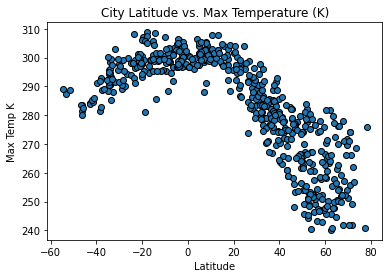

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor="black", linewidths=1, marker="o",
            )

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temp K")
plt.title("City Latitude vs. Max Temperature (K)")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

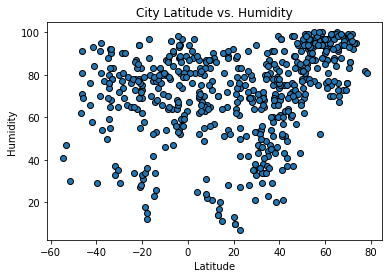

In [10]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor="black", linewidths=1, marker="o",)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
            
# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

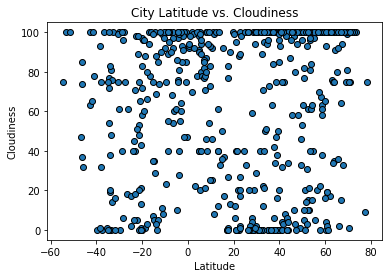

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o",)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

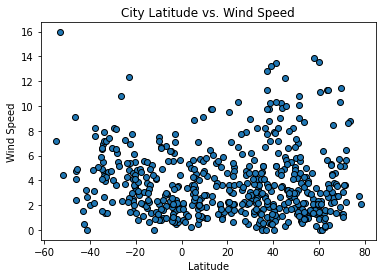

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor="black", linewidths=1, marker="o",)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

#def linregfunction(df,x_colm,y_colm)

#corr=round(st.pearsonr(meantumvol['Weight (g)'],meantumvol['Tumor_Volume_(mm3)'])[0],2)
#print(f"The correlation coefficient is {corr}")           

#x_values = df['x_vals']
#y_values = df['y_vals']

#regmodel=st.linregress(meantumvol['Weight (g)'],meantumvol['Tumor_Volume_(mm3)'])
#regmodel

#slope = regmodel[0]
#intercept = regmodel[1]
#rvalue = regmodel[2]
#pvalue = regmodel[3]
#stderr = regmodel[4]

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,midland,31.9974,-102.0779,279.85,54,0,4.63,US,1669910471
1,haines junction,60.7522,-137.5108,260.66,87,100,1.05,CA,1669910723
3,barrow,71.2906,-156.7887,266.16,93,100,3.60,US,1669910723
5,pudozh,61.8099,36.5345,263.40,93,100,0.96,RU,1669910724
6,ust-kuyga,70.0167,135.6000,251.06,99,100,1.27,RU,1669910724


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rikitea,-23.1203,-134.9692,296.40,73,71,4.86,PF,1669910723
4,bambous virieux,-20.3428,57.7575,297.71,72,13,3.52,MU,1669910723
8,hobart,-42.8794,147.3294,284.07,76,100,1.54,AU,1669910724
9,hermanus,-34.4187,19.2345,294.15,80,77,5.47,ZA,1669910629
10,avarua,-21.2078,-159.7750,298.18,94,75,4.63,CK,1669910724


###  Temperature vs. Latitude Linear Regression Plot

The correlation is -0.85


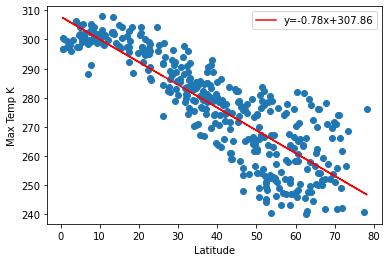

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
corr=round(st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])[0],2)
print(f"The correlation is {corr}")           

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

regmodel=st.linregress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
#regmodel

slope = regmodel[0]
intercept = regmodel[1]
rvalue = regmodel[2]
pvalue = regmodel[3]
stderr = regmodel[4]
line = slope*(northern_hemi_df['Lat'])+intercept
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Latitude')
plt.ylabel('Max Temp K')
plt.legend()
plt.show()


The correlation is 0.67


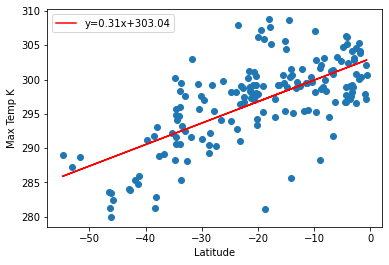

In [17]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
corr=round(st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])[0],2)
print(f"The correlation is {corr}")           

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

regmodel=st.linregress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
#regmodel

slope = regmodel[0]
intercept = regmodel[1]
rvalue = regmodel[2]
pvalue = regmodel[3]
stderr = regmodel[4]
line = slope*(southern_hemi_df['Lat'])+intercept
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Latitude')
plt.ylabel('Max Temp K')
plt.legend()
plt.show()

**Discussion about the linear relationship:** The Northern Hemispere shows a strong correlation (correlation value=-0.85) of decreasing temperature with increasing latitude. The Southern Hemisphere shows only a moderate strength correlation (correlation value=0.67) of decreasing temperature with increasing latitudes from the equator. 

### Humidity vs. Latitude Linear Regression Plot

The correlation is 0.44


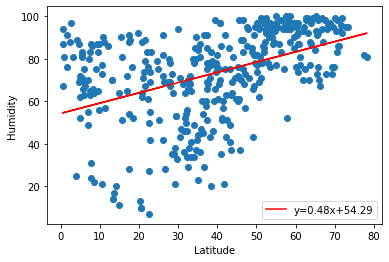

In [18]:
# Northern Hemisphere
corr=round(st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])[0],2)
print(f"The correlation is {corr}")           

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

regmodel=st.linregress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
#regmodel

slope = regmodel[0]
intercept = regmodel[1]
rvalue = regmodel[2]
pvalue = regmodel[3]
stderr = regmodel[4]
line = slope*(northern_hemi_df['Lat'])+intercept
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend()
plt.show()

The correlation is 0.1


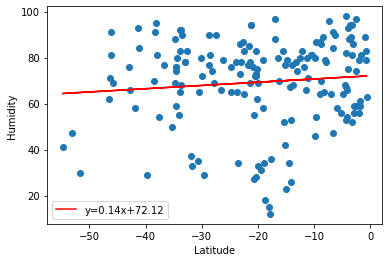

In [19]:
# Southern Hemisphere
# YOUR CODE HERE
corr=round(st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])[0],2)
print(f"The correlation is {corr}")           

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

regmodel=st.linregress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
#regmodel

slope = regmodel[0]
intercept = regmodel[1]
rvalue = regmodel[2]
pvalue = regmodel[3]
stderr = regmodel[4]
line = slope*(southern_hemi_df['Lat'])+intercept
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend()
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere there is only a weak correlation of decreasing humidity with increasing latitudes  (correlation value=0.41). There appears to be less scatter as lattitudes increase. In the southern hemisphere the correlation is none or very weak with a correlation value of 0.17.   

### Cloudiness vs. Latitude Linear Regression Plot

The correlation is 0.13


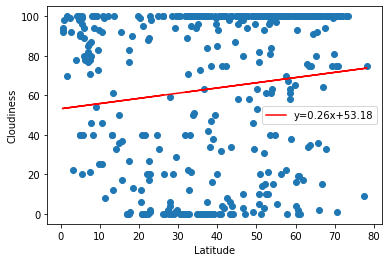

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
corr=round(st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])[0],2)
print(f"The correlation is {corr}")           

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

regmodel=st.linregress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
#regmodel

slope = regmodel[0]
intercept = regmodel[1]
rvalue = regmodel[2]
pvalue = regmodel[3]
stderr = regmodel[4]
line = slope*(northern_hemi_df['Lat'])+intercept
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend()
plt.show()

The correlation is 0.23


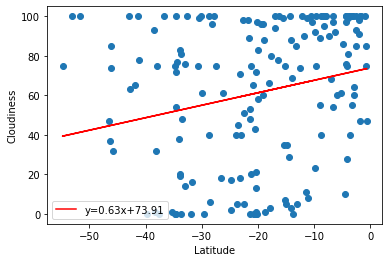

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
corr=round(st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])[0],2)
print(f"The correlation is {corr}")           

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

regmodel=st.linregress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
#regmodel

slope = regmodel[0]
intercept = regmodel[1]
rvalue = regmodel[2]
pvalue = regmodel[3]
stderr = regmodel[4]
line = slope*(southern_hemi_df['Lat'])+intercept
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend()
plt.show()

**Discussion about the linear relationship:** Both the northern and southern hemisphere data show no, or a very weak correlation of cloudiness with lattitude changes.  

### Wind Speed vs. Latitude Linear Regression Plot

The correlation is 0.03


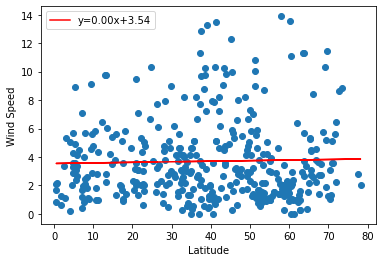

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
corr=round(st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])[0],2)
print(f"The correlation is {corr}")           

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

regmodel=st.linregress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
#regmodel

slope = regmodel[0]
intercept = regmodel[1]
rvalue = regmodel[2]
pvalue = regmodel[3]
stderr = regmodel[4]
line = slope*(northern_hemi_df['Lat'])+intercept
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

The correlation is -0.34


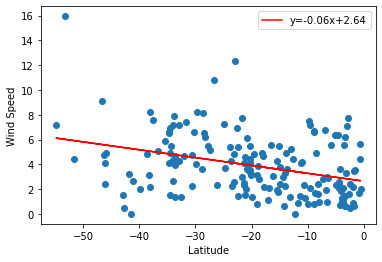

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
corr=round(st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])[0],2)
print(f"The correlation is {corr}")           

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

regmodel=st.linregress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
#regmodel

slope = regmodel[0]
intercept = regmodel[1]
rvalue = regmodel[2]
pvalue = regmodel[3]
stderr = regmodel[4]
line = slope*(southern_hemi_df['Lat'])+intercept
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

**Discussion about the linear relationship:** Both Northern and Southern hemisphere data shows very little correlation of wind speed with greater values of lattitude from the equator. Both slopes show an increase as the distance from the equator increases however the correlation is weak or very small.